# Giới thiệu

Đây là 1 phương pháp đơn giản nhất. KNN tìm đầu ra của 1 điểm dữ liệu dựa vào K điểm dữ liệu lân cận gần nhất trong tập huấn luyện

Mặc dù có nhiều hạn chế tuy nhiên khi giải 1 bài toán ta luôn cần 1 mô hình đơn giản để giải quyết nó trước, sau đó tìm cách tối ưu nó sau. Khi đó KNN vẫn là 1 giải pháp đầu tiên nên nghĩ tới

# Tóm tắt cách làm

###### B1: Chuẩn hóa (Scaler lại dữ liệu) vì sai lệch lớn giữa các Feature sẽ ảnh hưởng đến kết quả tính khoảng cách giữa chúng

###### B2: Lựa chọn số điểm lân cận để so sánh (K)
1 số cách chọn thông thường: 

- Sqrt(n) với n là số lượng data points


- Loop để tìm ra K có kết quả phân loại tốt và tốc độ xử lý là phù hợp với yêu cầu


###### B3: Lựa chọn K sample trong dataset mà gần với New_sample cần predict (Thường sử dụng Euclidean distance để tính khoảng cách)

###### B4: Dựa vào kết quả của K sample đã được lựa chọn, đưa ra dự đoán dựa trên số đông 

# Ưu - nhược điểm

###### Ưu điểm:
1, Thuật toán đơn giản và dễ thực hiện

2, Không cần xây dựng mô hình, điều chỉnh params nhiều


###### Nhược điểm

1, Thuật toán chậm khi số lượng sample và feature tăng

2, KNN có thể nhạy cảm với nhiều khi K nhỏ

# Khi nào sử dụng KNN

###### 1, Khi data đã được dán nhãn

Dữ liệu được gán nhãn rồi thì mới lựa chọn theo phương pháp voting được

###### 2, Dữ liệu không bị nhiễu

Như các phương pháp phân loại khác. KNN rất nhạy cảm với Outlier. Kết quả bị phụ thuộc nhiều vào chất lượng data. Dữ liệu bị gán nhãn sai cũng như các Outlier và sự chồng chéo giữa các vùng dữ liệu thuộc các lớp khác nhau dẫn tới việc phân loại kém. 
###### 3, Dữ liệu không quá lớn

Với mỗi sample KNN sẽ tính toán khoảng cách tới tất cả các tranning data và lưu chúng lại, Sau đó sort chúng để chọn ra K vector gần nhất. Nếu dữ liệu lớn và có nhiều feature, việc tính toán và lưu trữ sẽ rất tốn thời gian

In [4]:
import csv
import numpy as np
import math
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [22]:
def loadData(path):
    f = open(path, "r")
    data = csv.reader(f) #csv format
    data = np.array(list(data))# covert to matrix
    data = np.delete(data, 0, 0)# delete header
    data = np.delete(data, 0, 1) # delete index
    np.random.shuffle(data) # shuffle data
    f.close()
    trainSet = data[:100] #training data from 1->100
    testSet = data[100:]# the others is testing data
    return trainSet, testSet

def calcDistancs(pointA, pointB, numOfFeature=4):
    tmp = 0
    for i in range(numOfFeature):
        tmp += (float(pointA[i]) - float(pointB[i])) ** 2  #chỉ lấy 4 feature đầu tiên do cột cuối cùng là kết quả
    return math.sqrt(tmp)                                  # Trả ra kết quả tính khoảng cách 



def kNearestNeighbor(trainSet, point, k):    #
    distances = []    
    for item in trainSet:                    #Loop1: Loop qua hết bản ghi của trainset
        distances.append({                            #tạo dict: {label : khoảng cách từ $1$ point tới tất cả points của train }
            "label": item[-1],
            "value": calcDistancs(item, point)                   #Chạy funct calDistancs để tính khoảng cách
        })
    distances.sort(key=lambda x: x["value"])          # sort lại theo khoảng cách
    labels = [item["label"] for item in distances]    # Lấy tên clabel sau khi đã sort
    return labels[:k]                       # Lấy K kết quả nhãn gần nhất



def findMostOccur(arr):
    labels = set(arr)           # lấy ra danh sách label unique, rồi loop danh sách này với bản gốc để đếm số lần xuất hiện
    ans = ""
    maxOccur = 0
    for label in labels:        # Loop1:Duyệt qua từng nhãn thu đc, cập nhật nhãn có số lần xuất hiện nhiều nhất qua mỗi vòng
        num = arr.count(label)             # đếm trong list kết quả mới thu được, lable đấy chiếm bao nhiêu lần,
        if num > maxOccur:                 # Nếu số lần lớn hơn kết quả trước đó (first_time = 0) thì :
            maxOccur = num                         #- Update lại maxOrcur
            ans = label                            #- Gán nhãn dữ liệu tìm được, quay lại vòng For để tìm các Kết Qủa còn lại
                              
    return ans                   # Sau khi chạy hết vòng loop sẽ Trả ra kết quả nhãn chiếm đa số


In [28]:
trainSet, testSet = loadData("./Iris.csv")

In [277]:
numOfRightAnwser = 0
for item in testSet:                               #Loop2: Chạy nốt các phần còn lại trong item với Loop1
    Distancs = kNearestNeighbor(trainSet, item, 5)       #Loop1: Tính khoảng cách từ 1 điểm trong test_set tới tất cả các điểm
                                                         #của train_data
                                                                   #Sort và lấy 5 nhãn dữ liệu có Distance nhỏ nhất                     
    
    answer = findMostOccur(Distancs)                     # Trả tra kết quả nhãn tìm được
    numOfRightAnwser += item[-1] == answer
    print("label: {} -> predicted: {}".format(item[-1], answer))
print("\n\n NumOfRightAnwser: {}, test_size {}, Tỷ lệ chính xác = {}".format(numOfRightAnwser,len(testSet),numOfRightAnwser/len(testSet)))

label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-versicolor -> predicted: Iris-virginica
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-virginica -> predicted: Iris-virginica
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-versicolor -> predicted: Iris-versicolor
label: Iris-setosa -> predicted: Iris-setosa
label: Iris-virginica -> predicted

###### KNN - Phân loại ảnh
https://github.com/henry2394/henry/blob/main/KNN%20-%20Ph%C3%A2n%20lo%E1%BA%A1i%20%E1%BA%A3nh.ipynb

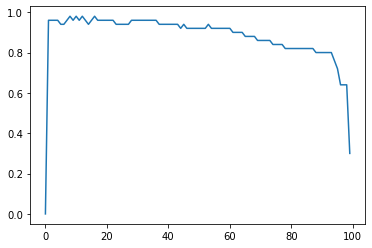

In [283]:
result = []
k = []
for i in range(100):
    k.append(i)
    numOfRightAnwser = 0
    for item in testSet:
        Distancs = kNearestNeighbor(trainSet, item, i)
        answer = findMostOccur(Distancs)
        numOfRightAnwser += item[-1] == answer
    result.append(numOfRightAnwser/len(testSet))
    
import matplotlib.pyplot as plt
plt.plot(k,result)

# Khi càng tăng K kết quả có thể sẽ giảm xuống rất nhiều vì bị nhiễu

# 1 Số phương pháp để cải thiện nhược điểm của KNN

### 1. Đánh trọng số cho các điểm lân cân
Với kĩ thuật trên thì trong các điểm gần nhất có VAI TRÒ như nhau --> Không công bằng vì các điểm gần hơn nên có trọng số cao hơn.

Cách 1: Lấy nghịch đảo của khoảng cách tới điểm lân cận, 1 số trường hợp nếu khoảng cách =0 thì lấy đâu ra của điểm đó luôn.
Trong sklearn ta set param weights = 'distance'

In [267]:
def kNearestNeighbor2(trainSet, point, k):    #
    distances = pd.DataFrame(columns=['label','value'])
    label = []
    value = []
    for item in trainSet:                    
        if calcDistancs(item, point) ==0:
            return item[-1]
        else:
            label.append(item[-1])
            value.append(1/calcDistancs(item, point))                  
    distances.label = label
    distances.value = value
    distances = distances.sort_values('value', ascending= False).iloc[:k]
    ans = distances.groupby('label').sum().sort_values('value',ascending=False).reset_index().iloc[0].label
    return ans

In [268]:
right = 0
for item in testSet:                              
    answer = kNearestNeighbor2(trainSet, item, 5)
    right += item[-1] == answer
    print("label {}  / Predict: {} ".format(item[-1],answer))
    
print("\n\n NumOfRightAnwser: {}, test_size {}, Tỷ lệ chính xác = {}".format(right,len(testSet),right/len(testSet)))

label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-virginica  / Predict: Iris-virginica 
label Iris-virginica  / Predict: Iris-virginica 
label Iris-versicolor  / Predict: Iris-virginica 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-setosa  / Predict: Iris-setosa 
label Iris-setosa  / Predict: Iris-setosa 
label Iris-virginica  / Predict: Iris-virginica 
label Iris-virginica  / Predict: Iris-virginica 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-setosa  / Predict: Iris-setosa 
label Iris-versicolor  / Predict: Iris-versicolor 
label Iris-setosa  / Predict: Iris-setosa 
label Iris-virginica  / Predict: Iris-virginica 
label Iris-setosa  / Pr

### 2. Sử dụng khoảng Min/Max point của từng Class để tăng tốc độ tính toán với dữ liệu lớn

###### B1: Tại mỗi Class tìm ra phạm vi/không gian của nó bằng cách xác định min/max point, Boundary của toàn bộ dữ liệu

    Vd: Class A = {(11,19,18),(10,26,17),(25,25,19),(29,17,18),(31,12,20)}
        --->    Max_point = (31,26,20)    /    Min_point = (10,12,17)
        --->    Boundary (Các điểm nằm trên min/max point)  =  {(10,26,17),(31,12,20)}
        
        
        Class B = {(1,1,6),(2,5,7),(3,7,8),(4,9,3),(5,2,10)}
        --->    Max_point = (5,9,10)    /    Min_point = (1,1,3)
        --->    Boundary (Các điểm nằm trên min/max point) = {(1,1,6),(4,9,3),(5,2,10)}     
        
###### B2: Xác định Class cho điểm dữ liệu mới

    (1) Nếu điểm dữ liệu nó thuộc khoảng Min - Max point --> Nhận luôn giá trị của Class đó
        
        VD: Điểm  c(15,18,18) thuộc min-max point của Class A --> Kết quả được gán là A
    
    (2) Nếu điểm dữ liệu không thuộc khoảng Min-Max point của bất kỳ class nào cả --> Tính khoảng cách của nó tới Boundaries của mỗi Class. Lựa chọn Class mà có khoảng cách tới Boundaries là nhỏ nhất
    
        VD: Điểm  t(6,10,2) Không thuộc min-max point của Class A  hay Class B --> Tính khoảng cách của d tới mọi Boundaries của Class A và Class B . 
            Khoảng cách ngắn nhất từ t -> Class B = 2.449
            Khoảng cách ngắn nhất từ t -> Class A = 22.293
             ----> Gán cho kết quả là Class B

###### Lưu ý: Trong trường hợp Min-Max point của các Class trùng nhau, ta sẽ bỏ giá trị hiện tại đi và lấy cái điểm Max/Min tiếp theo trong tập dữ liệu cho tới khi không gian của các Class không còn trùng nhau nữa, ví dụ:

    C3={(1,1),(2,2),(1,16),(10,1),(10,15),(12,1),(12,16)}  --> C3min = (1,1) và C3max = (12,16)
    C4={(10,2),(13,3),(13,17),(10,18),(19,17),(20,2),(20,18)}  --> C4min = (10,2) và C4max = (20,18)
    
    ----> C3max nằm trong khoảng min-max point của C4. Do vậy điểm T = (10,9) không thể xác định được. Khi đó ta lấy lùi lại 1 đơn vị min/max của cả 2 Class. Min-Max poitn sẽ thay đổi: 
          C3min = (2,2) và C3max = (10,15)  //   C4min = (13,3) và C4max = (19,17)
                ->  T = (10,9) thuộc Class C3
                
                
    T2 = (11,9) Không thuộc class nào cả. Mặc dù sau khi điều chỉnh, Min-max point có thay đổi, tuy nhiên ta vẫn giữ nguyên cái Boundary ban đâu và tính toán khoảng cách từ T2 tới các Boundaries. Lựa chọn khoảng cách ngắn nhất và gán nhãn
           Ta có T3 --> C3: 6.08  // T3 --> C4: 6.32  ==> T2 thuộc C3


        